In [1]:
import os
import numpy as np

In [2]:
result_data = np.loadtxt(r'C:\Users\Zamani\result.txt', dtype=str)
print(result_data)
np.shape(result_data)
y=np.reshape(result_data,[1000,16])
np.shape(y)
#y

['2F225DF88C90DD1D' '8C90DD1D2A185B63' '2A185B63350C9C81' ...
 '6CDA5DF65547C4D2' '5547C4D29A4C8371' '9A4C83716FDA5CE2']


(1000, 16)

In [3]:
R0 = y[:,0]
R1 = y[:,1]
R2 = y[:,2]
R3 = y[:,3]
R4 = y[:,4]
R5 = y[:,5]
R6 = y[:,6]
R7 = y[:,7]
R8 = y[:,8]
R9 = y[:,9]
R10 = y[:,10]
R11 = y[:,11]
R12 = y[:,12]
R13 = y[:,13]
R14 = y[:,14]
R15 = y[:,15]

In [4]:
n = 2
T = np.stack((R0,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,R12,R13,R14,R15),axis=1)
np.shape(T)

(1000, 15)

In [5]:
T[0][0]

'2F225DF88C90DD1D'

In [6]:

my_list = [T[0][1][idx:idx + n] for idx in range(0,15,n)]
my_list


['8C', '90', 'DD', '1D', '2A', '18', '5B', '63']

In [22]:
my_List = np.empty((1000,15,8),dtype=int)
for i in range(0,1000):
    for j in range(0,15):
#         print(j)
        x = 0
        for idx in range(0,15,n):
#             print(idx)
            my_List[i,j,x] = int(T[i][j][idx:idx+n],16)
            x = x+1
    

In [23]:
my_List.shape

(1000, 15, 8)

In [25]:
my_List = my_List.reshape((1000,15*8))
my_List[0]

array([ 47,  34,  93, 248, 140, 144, 221,  29, 140, 144, 221,  29,  42,
        24,  91,  99,  42,  24,  91,  99,  53,  12, 156, 129,  53,  12,
       156, 129,  72, 243, 113, 192,  72, 243, 113, 192,  33, 129, 158,
        56,  33, 129, 158,  56,  14, 198, 231,  73,  14, 198, 231,  73,
       245,  81,  29, 180, 245,  81,  29, 180, 110,  26,  46,  45, 110,
        26,  46,  45, 150, 250,  89,  28, 150, 250,  89,  28, 159, 126,
       165,   5, 159, 126, 165,   5,  24, 120, 103, 211,  39, 131,  51,
       220, 217, 186, 231, 252, 217, 186, 231, 252, 187, 123,   3,  59,
       187, 123,   3,  59, 136,  23,  49, 217, 136,  23,  49, 217, 185,
       243, 232, 181])

In [26]:
my_List.shape

(1000, 120)

In [27]:
 HW = np.array([0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4, 1, 2, 2, 3,
                   2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 1, 2, 2, 3, 2, 3, 3, 4,
                   2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5,
                   4, 5, 5, 6, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5,
                   2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 2, 3, 3, 4,
                   3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6,
                   4, 5, 5, 6, 5, 6, 6, 7, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4,
                   3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6,
                   2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5,
                   4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7, 2, 3, 3, 4, 3, 4, 4, 5,
                   3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6,
                   5, 6, 6, 7, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7,
                   4, 5, 5, 6, 5, 6, 6, 7, 5, 6, 6, 7, 6, 7, 7, 8],
                  dtype=np.uint8)

In [12]:
import matplotlib.pyplot as plt

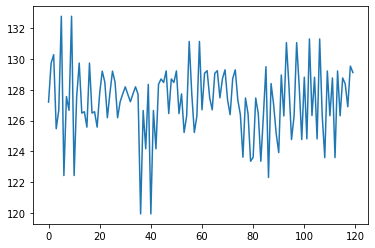

In [28]:
plt.plot(np.mean(my_List,axis=0))

In [29]:
my_List.shape

(1000, 120)

In [35]:
H = HW[my_List[0]]
H

array([5, 2, 5, 5, 3, 2, 6, 4, 3, 2, 6, 4, 3, 2, 5, 4, 3, 2, 5, 4, 4, 2,
       4, 2, 4, 2, 4, 2, 2, 6, 4, 2, 2, 6, 4, 2, 2, 2, 5, 3, 2, 2, 5, 3,
       3, 4, 6, 3, 3, 4, 6, 3, 6, 3, 4, 4, 6, 3, 4, 4, 5, 3, 4, 4, 5, 3,
       4, 4, 4, 6, 4, 3, 4, 6, 4, 3, 6, 6, 4, 2, 6, 6, 4, 2, 2, 4, 5, 5,
       4, 3, 4, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 2, 5, 6, 6, 2, 5, 2, 4,
       3, 5, 2, 4, 3, 5, 5, 6, 4, 5], dtype=uint8)

In [37]:
hypo = np.empty((1000,120),dtype="uint8")
for i in range(1000):
    for j in range(120):
        hypo[i,j] = HW[my_List[i][j]]


In [38]:
hypo

array([[5, 2, 5, ..., 6, 4, 5],
       [3, 3, 4, ..., 7, 3, 5],
       [4, 2, 2, ..., 5, 1, 5],
       ...,
       [7, 5, 2, ..., 4, 6, 2],
       [3, 3, 3, ..., 5, 4, 4],
       [4, 4, 3, ..., 5, 4, 4]], dtype=uint8)

In [40]:
target_noise_db = 0
target_noise_watts = 10**(target_noise_db/64)
noise_mean = 0
noise_power = np.random.normal(noise_mean,np.sqrt(target_noise_watts),hypo.shape)
powertrace = hypo + noise_power

In [41]:
powertrace

array([[8.27513237, 1.51240741, 5.51901764, ..., 5.98387854, 5.05528143,
        3.48348688],
       [1.2208228 , 3.31374485, 4.09803656, ..., 6.02548613, 2.69483242,
        3.9368142 ],
       [4.76490631, 0.26510265, 0.91898289, ..., 5.17467495, 0.41862371,
        5.07871108],
       ...,
       [5.49895888, 7.85418415, 2.96875921, ..., 5.25151006, 5.10418113,
        2.74822266],
       [2.36183532, 2.60764555, 1.70050523, ..., 6.07008649, 2.83599683,
        2.25697489],
       [4.75765686, 3.12529401, 5.78089708, ..., 4.49825604, 5.03239071,
        4.01045461]])

In [42]:
np.save("powertraces",powertrace)